In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv("./Train/Train.csv")

In [112]:
X = df.values[:,:5]
Y = df.values[:,5]

u = np.mean(X,axis = 0)
std = np.std(X,axis = 0)
X = (X-u)/std

#ones = np.ones((X.shape[0],1))
#X = np.hstack((ones, X))

print(X.shape, Y.shape)

(1600, 5) (1600,)


In [113]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    error = 0.0
    y_ = hypothesis(X, theta)
    error = np.sum((y-y_)**2)
    
    return error/X.shape[0]

def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    
    return grad/X.shape[0]
    
def gradientDescent(X, y, learning_rate=0.1, max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, y, theta)
        error_list.append(e)
        
        # gradient descent
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [114]:
theta, error_list = gradientDescent(X, Y)

In [115]:
print(theta.shape, theta)

(5,) [29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


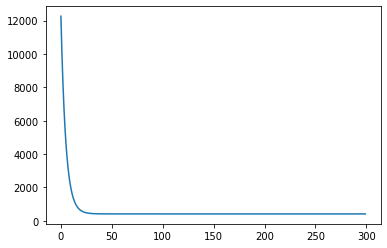

In [116]:
plt.plot(error_list)

In [117]:
X_test = pd.read_csv("./Test/Test.csv").values
print(X_test.shape)

(400, 5)


In [119]:
Y_ = hypothesis(X, theta)
Y_test = hypothesis(X_test, theta)

In [120]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = 1 - num/denom
    return score*100

In [123]:
print(r2_score(Y, Y_))

96.60856726304088


In [124]:
df_test = pd.DataFrame(data=Y_test, columns=['target'])

print(df_test.head(5))

       target
0  111.832848
1  115.560932
2  -26.195097
3  -47.954675
4 -102.836817


In [125]:
df_test.to_csv('y_predictions.csv', index=True)